In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import xarray as xr

import opensense_data_downloader_and_transformer as oddt

# Single E-band CML data from Czech Republic
source: https://zenodo.org/record/5013463/files/Dataset_1.0.0.zip

Note that this dataset contains much more than just the CML data, but for now we only parse the CML data.

In [3]:
oddt.download_fencl_2021_Eband_data(local_path='fencl_2021_Eband_data', print_output=True);

File already exists at desired location fencl_2021_Eband_data/Dataset_1.0.0.zip
Not downloading!


In [4]:
ds = oddt.tranform_fencl_2021_Eband_data('fencl_2021_Eband_data/Dataset_1.0.0.zip')
ds

<xarray.Dataset>
Dimensions:           (sublink_id: 2, time: 59328)
Coordinates:
  * time              (time) datetime64[ns] 2019-03-10 ... 2019-10-01T23:55:00
    cml_id            <U16 'cz_example_cml_1'
    length            float64 4.866
  * sublink_id        (sublink_id) <U2 'ab' 'ba'
    site_a_longitude  float64 14.53
    site_b_longitude  float64 14.53
    site_a_latitude   float64 50.03
    site_b_latitude   float64 50.03
Data variables:
    trsl              (sublink_id, time) float64 50.3 50.3 50.2 ... 50.2 50.3
    frequency         (sublink_id) float64 73.5 83.5

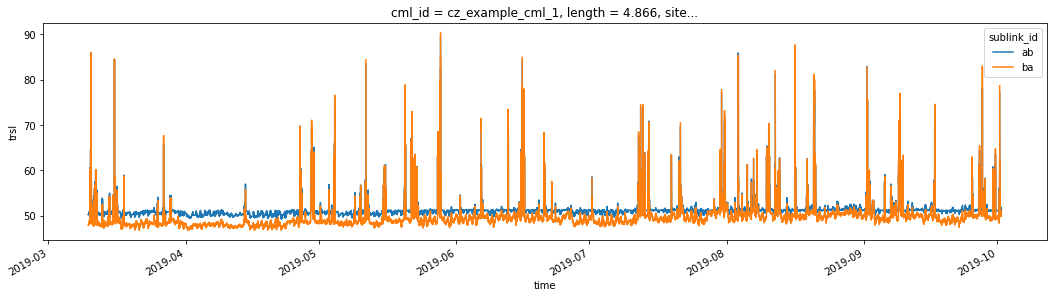

In [5]:
ds.trsl.plot.line(x='time', figsize=(18,4));

# Data from 6 Eband CMLs from Czech Republic

In [6]:
oddt.download_fencl_2020_Eband_data(
    local_path='fencl_2020_Eband_CML',
    print_output=True,
)

File already exists at desired location fencl_2020_Eband_CML/dataset.zip
Not downloading!


In [7]:
ds_list = oddt.transform_fencl_2020_Eband_data('fencl_2020_Eband_CML/dataset.zip')

Parsing raw data from raw/commercial_microwave_links_total_loss/1a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/1b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/2a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/2b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/3a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/3b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/4a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/4b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/5a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/5b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/6a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/6b.csv


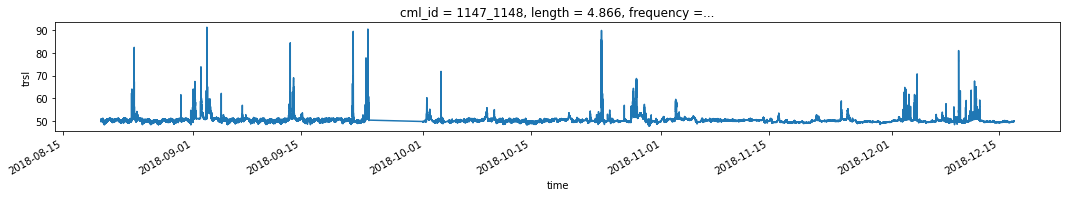

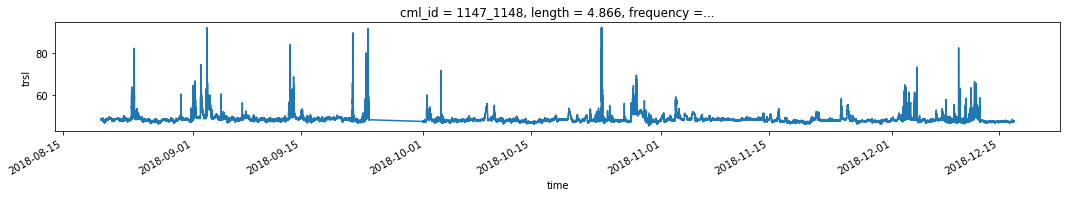

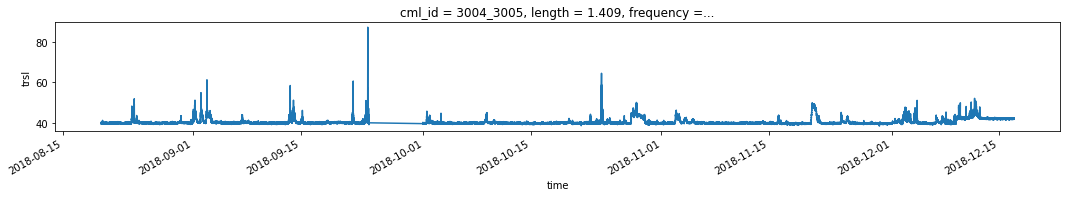

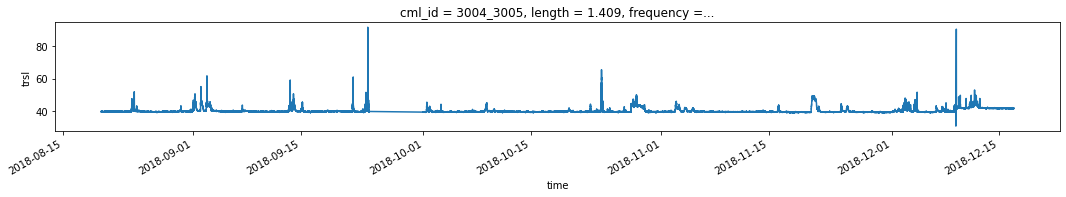

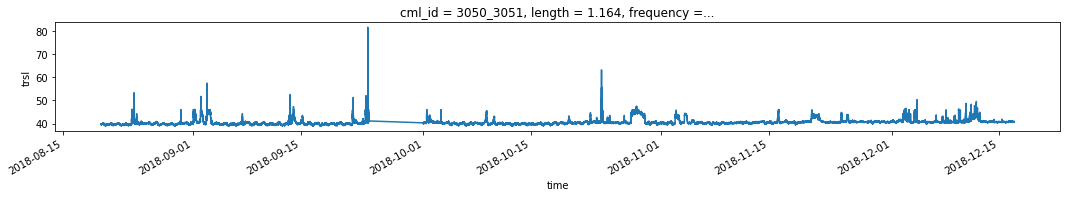

In [11]:
for ds in ds_list[:5]:
    ds.trsl.plot(x='time', figsize=(18, 2));

# Example data from German CMLs with fake coordinates
Provided as example data in `pycomlink`

In [9]:
oddt.download_data_file(
    url='https://github.com/pycomlink/pycomlink/raw/master/pycomlink/io/example_data/example_cml_data.nc',
    local_path='pycomlink_example_data',
    print_output=True,
)

File already exists at desired location pycomlink_example_data/example_cml_data.nc
Not downloading!


In [6]:
ds = xr.open_dataset('pycomlink_example_data/example_cml_data.nc')
ds

<xarray.Dataset>
Dimensions:           (time: 15840, cml_id: 500, channel_id: 2)
Coordinates:
  * time              (time) datetime64[ns] 2018-05-10 ... 2018-05-20T23:59:00
  * cml_id            (cml_id) object 'FY0013_2_FY1257_3' ... 'SY8534_2_SY237...
    length            (cml_id) float64 ...
    site_a_latitude   (cml_id) float64 ...
    site_a_longitude  (cml_id) float64 ...
    site_b_latitude   (cml_id) float64 ...
    site_b_longitude  (cml_id) float64 ...
  * channel_id        (channel_id) object 'channel_1' 'channel_2'
    frequency         (cml_id, channel_id) float64 ...
    polarization      (cml_id, channel_id) object ...
Data variables:
    rsl               (channel_id, cml_id, time) float32 ...
    tsl               (channel_id, cml_id, time) float32 ...

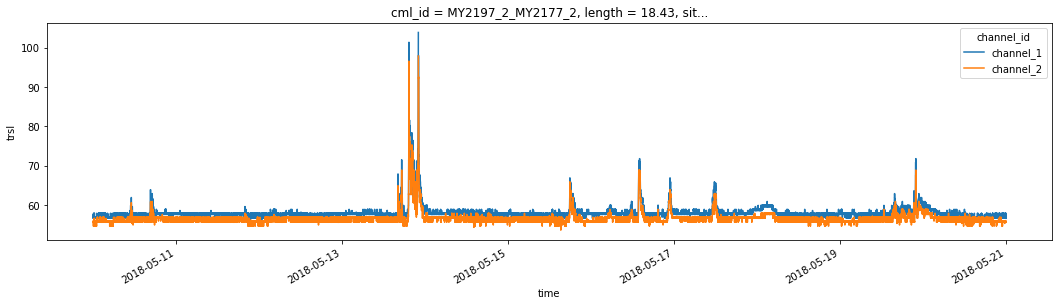

In [7]:
# Set defaul fill values to NaN
ds['tsl'] = ds.tsl.where(ds.tsl != 255.0)
ds['rsl'] = ds.rsl.where(ds.rsl != -99.9)
# Calculate TRSL
ds['trsl'] = ds.tsl - ds.rsl
# Plot
ds.isel(cml_id=42).trsl.plot.line(x='time', figsize=(18,4));

# WIP

In [9]:
oddt.download_data_file(
    "https://zenodo.org/record/4090953/files/dataset.zip",
    local_path="fencl_2020_Eband_CML",
    print_output=True,
)
    

File already exists at desired location fencl_2020_Eband_CML/dataset.zip
Not downloading!


## parse the manually unzipped data

In [12]:
import pandas as pd

In [25]:
df = pd.read_csv(
    'fencl_2020_Eband_CML/raw/commercial_microwave_links_total_loss/1a.csv',
    index_col=0,
    parse_dates=True,
    sep=';',
)
df

,total_loss
time,
2018-08-20 00:00:01,50.4
2018-08-20 00:00:06,50.4
2018-08-20 00:00:10,50.3
2018-08-20 00:00:15,50.3
2018-08-20 00:00:19,50.3
...,...
2018-12-16 22:58:46,50.1
2018-12-16 22:58:51,50.1
2018-12-16 22:58:55,50.1


In [18]:
df_metadata = pd.read_csv(
    'fencl_2020_Eband_CML/raw/commercial_microwave_links_total_loss/metadata_table_commercial_microwave_links.csv',
    index_col=0,
    sep=';',
)
df_metadata

,lonA,latA,lonB,latB,freqA,freqB,polA,polB,length,idglob,manufacturer,type,id_old
id,,,,,,,,,,,,,
1,14.53,50.03,14.60,50.03,73.50,83.50,V,V,4866,52206_52205,Ericsson,MINILINK,1147_1148
2,14.53,50.03,14.51,50.02,73.75,83.75,V,V,1409,51808_51814,Ericsson,MINILINK,3004_3005
3,14.53,50.03,14.51,50.03,72.75,82.75,V,V,1164,51928_51927,Ericsson,MINILINK,3050_3051
4,14.53,50.03,14.52,50.03,74.25,84.25,H,H,765,51895_51896,Ericsson,MINILINK,3010_3011
5,14.53,50.04,14.53,50.03,73.00,83.00,V,V,573,51759_51758,Ericsson,MINILINK,3007_3006
6,14.53,50.03,14.53,50.03,73.25,83.25,H,H,389,51765_51764,Ericsson,MINILINK,3008_3009


In [38]:
fn = "fencl_2020_Eband_CML/dataset.zip"

zfile = zipfile.ZipFile(fn)
zfile.f

In [40]:
import os

ds_list = []

fn = "fencl_2020_Eband_CML/dataset.zip"

with zipfile.ZipFile(fn) as zfile:
    for i, row in df_metadata.iterrows():
        for ab in ['a', 'b']:
            raw_data_fn = os.path.join('raw/commercial_microwave_links_total_loss', f'{i}{ab}.csv')
            print(f'Parsing raw data from {raw_data_fn}')
            # get file handle for CSV files stored in the ZIP file    
            f = zfile.open(raw_data_fn)
            df_data = pd.read_csv(
                f,
                index_col=0,
                parse_dates=True,
                sep=';',
            )
            ds_list.append(
                xr.Dataset(
                    data_vars={'trsl': (('time'), df_data.total_loss)},
                    coords=dict(
                        time=df_data.index.values,
                        cml_id=row.id_old,
                        length=row.length/1e3,
                        frequency=row[f'freq{ab.upper()}'],
                        site_a_longitude=row.lonA,
                        site_b_longitude=row.lonB,
                        site_a_latitude=row.latA,
                        site_b_latitude=row.latB,
                    ),
                )
            )

Parsing raw data from raw/commercial_microwave_links_total_loss/1a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/1b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/2a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/2b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/3a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/3b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/4a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/4b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/5a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/5b.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/6a.csv
Parsing raw data from raw/commercial_microwave_links_total_loss/6b.csv


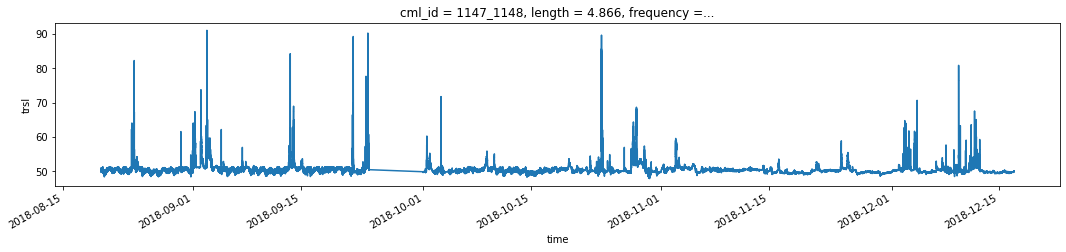

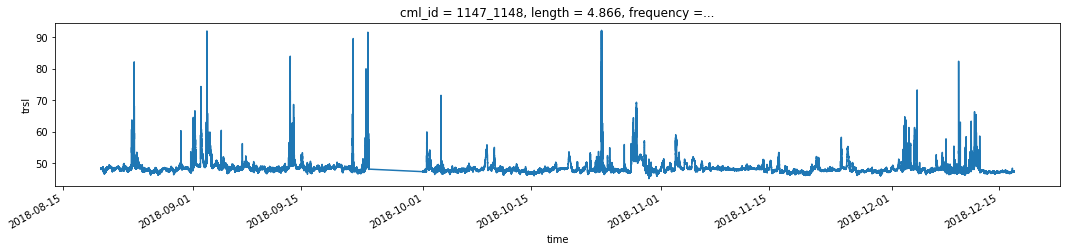

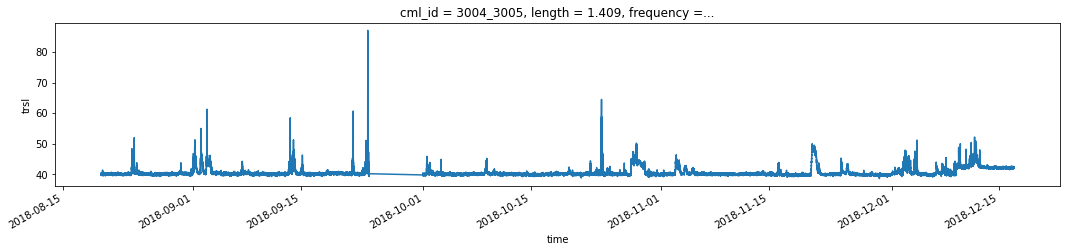

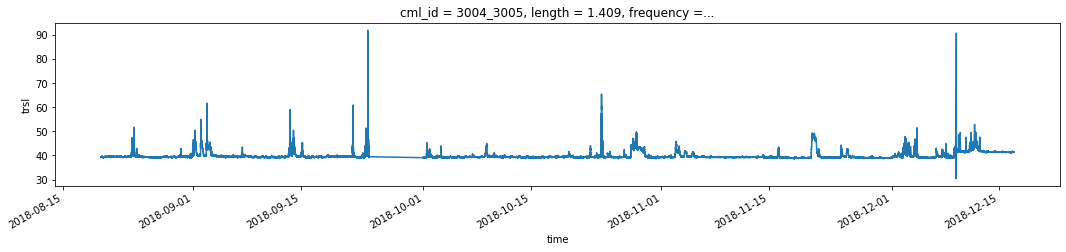

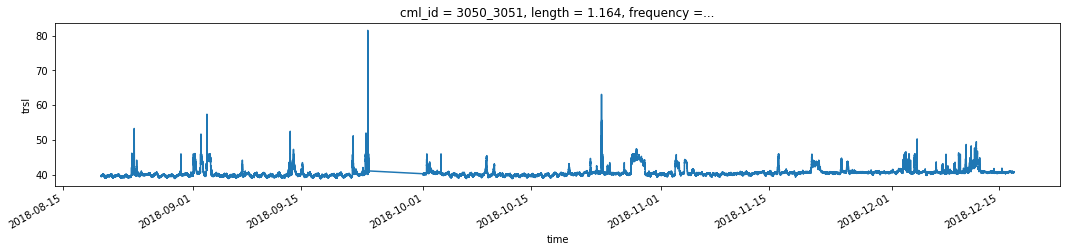

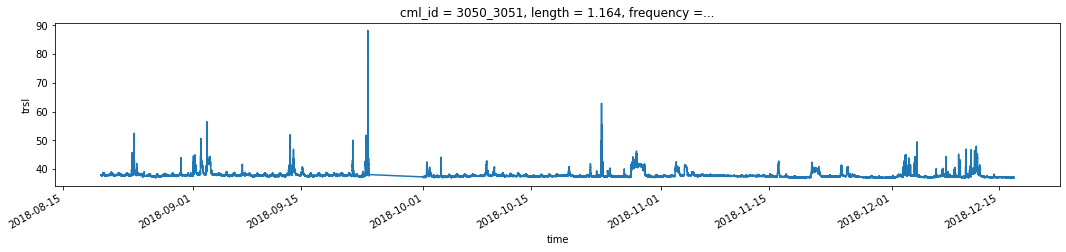

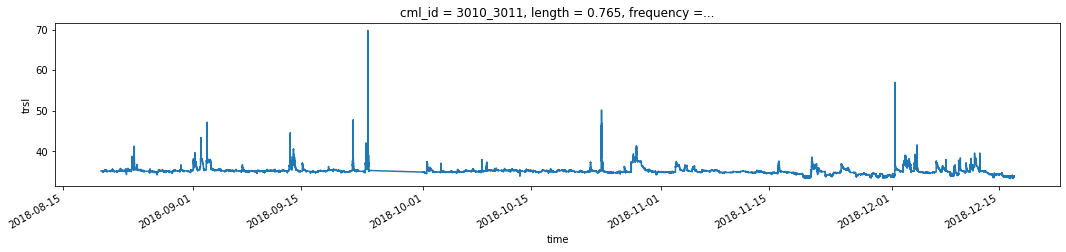

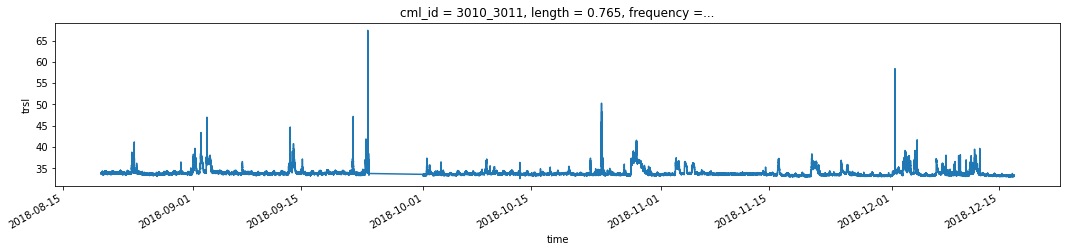

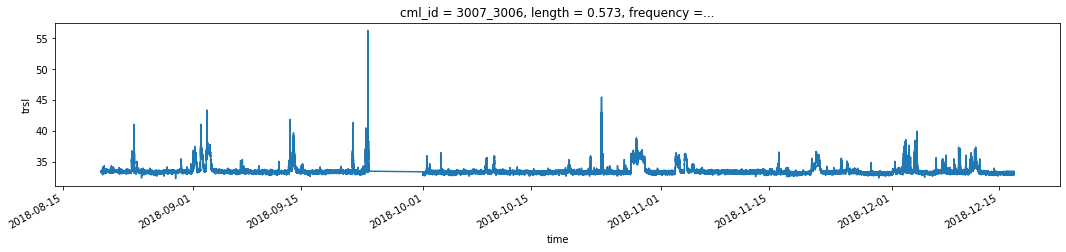

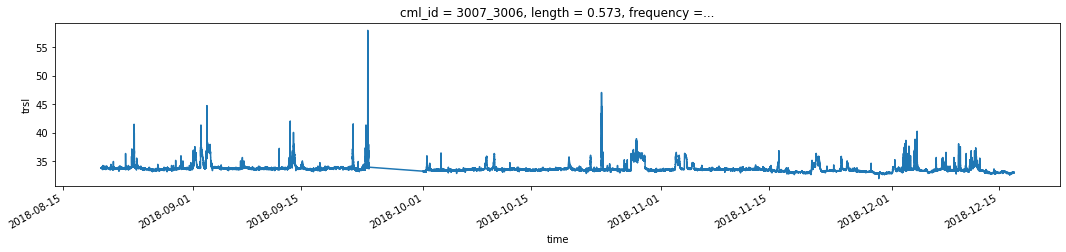

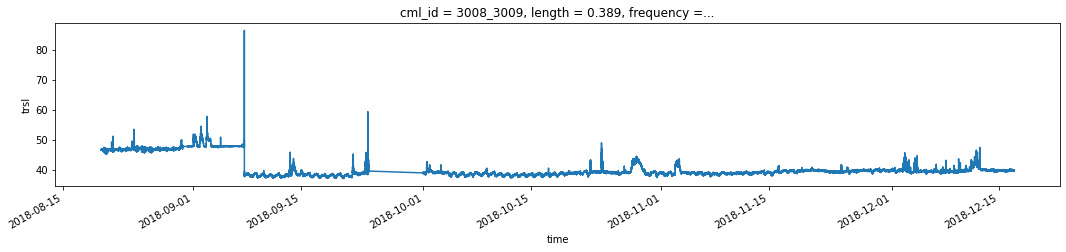

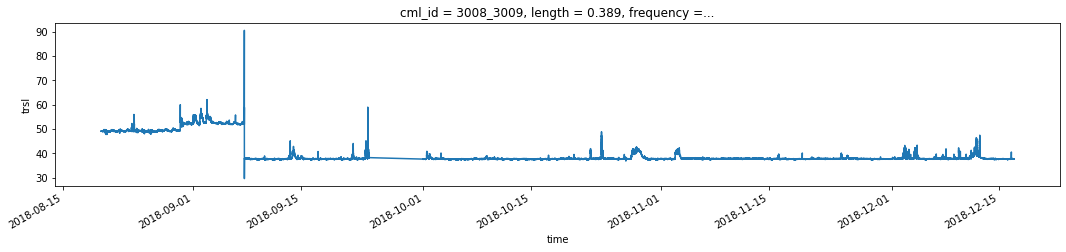

In [41]:
for ds in ds_list:
    ds.trsl.plot(x='time', figsize=(18, 2));

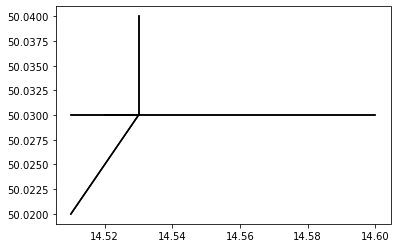

In [36]:
import matplotlib.pyplot as plt
for ds in ds_list:    
    plt.plot([ds.site_a_longitude, ds.site_b_longitude], [ds.site_a_latitude, ds.site_b_latitude], "-", c="black")